# Introduction

Udacity Project 2 is based of the use of python and it libraries for data wrangling and analysis.
Real-world data rarely come clean therefore data wrangling is an important part of a data analyst job. Gathering data from a variety of sources and in a variety of formats, assessing its quality and tidiness as well as  cleaning it is called data wrangling.

The datasets that I will wrangle are as follows:

## Data Sources

1. Name: WeRateDogs Twitter Archive (twitter-archive-enhanced.csv)
Data Content: Basic tweet data for all 5000+ of their tweets. One column the archive does contain though: each tweet’s text, which is used to extract rating, dog name, and dog “stage” (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive “enhanced.” Of the 5000+ tweets, only tweets with ratings only (there are 2356) is used in this dataset.
2. Name: Tweet image predictions (image_predictions.tsv)

Data Content: what breed of dog (or other objects, animal, etc.) is present in each tweet according to a neural network.

Data is gathered programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Name: WeRateDogs

Data Content: Each tweet’s retweet count and favorite (“like”) count at minimum, and any additional data you find interesting.

How to gather: Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet’s JSON data using Python’s Tweepy library and store each tweet’s entire set of JSON data in a file called tweet_json.txt file.


# Gather Data

In [1]:
#import all necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###import liabraries to read files and download data from twitter api.
import requests
import tweepy
import json

In [2]:
import os
os.getcwd()

'/Users/mac'

In [3]:
#Dataset 1
##load the twitter-archive-enhanced.csv provided by udacity
df = pd.read_csv('/Users/mac/Downloads/twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
##Dataset 2
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
##open the tsv file and save to dataframe.pi

with open('image_prediction.tsv', mode = 'wb')as file:
    file.write(response.content)
 
images = pd.read_csv('image_prediction.tsv',sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
#Dataset 3- Twitter API data.
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token ='hidden'
access_secret = 'hidden'

# auth = OAuthHandler(consumer_key, consumer_secret)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#Setting the wait_on_rate_limit and wait_on_rate_limit_notify parameters to True in the tweepy.api class to control #the rate of traffic sent or received by a server

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump([tweet._json], outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 246


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 234


Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
18

Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
20

Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
23

In [9]:
# reading the file line by line to get each json data and store in a list

with open('tweet_json.txt','r') as json_file:
    file = []
    for line in json_file:
        lines = line.replace('\n','')
        file.append(lines)
lenght_of_line = len(file)
tweet_id = []
retweet_count = []
favorite_count = []
retweeted = []
data = {'tweet_id':[],'retweet_count':[],'favorite_count':[],'retweeted':[]}
for i in range(lenght_of_line):
    dictionary = json.loads(file[i])
    tweet_id.append(dictionary[0]['id'])
    retweet_count.append(dictionary[0]['retweet_count'])
    favorite_count.append(dictionary[0]['favorite_count'])
    retweeted.append(dictionary[0]['retweeted'])
data.update({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count,'retweeted':retweeted}) 
twitter_data = pd.DataFrame(data)

# saving the dataframe into a tweet_json.txt 
twitter_data

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,7000,33801,False
1,892177421306343426,5298,29315,False
2,891815181378084864,3477,22043,False
3,891689557279858688,7222,36917,False
4,891327558926688256,7754,35297,False
...,...,...,...,...
2321,666049248165822465,37,89,False
2322,666044226329800704,115,247,False
2323,666033412701032449,36,100,False
2324,666029285002620928,39,112,False


# Access Data

### DATA 1: WeRateDogs Twitter Archive (twitter-archive-enhanced.csv)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<AxesSubplot:>

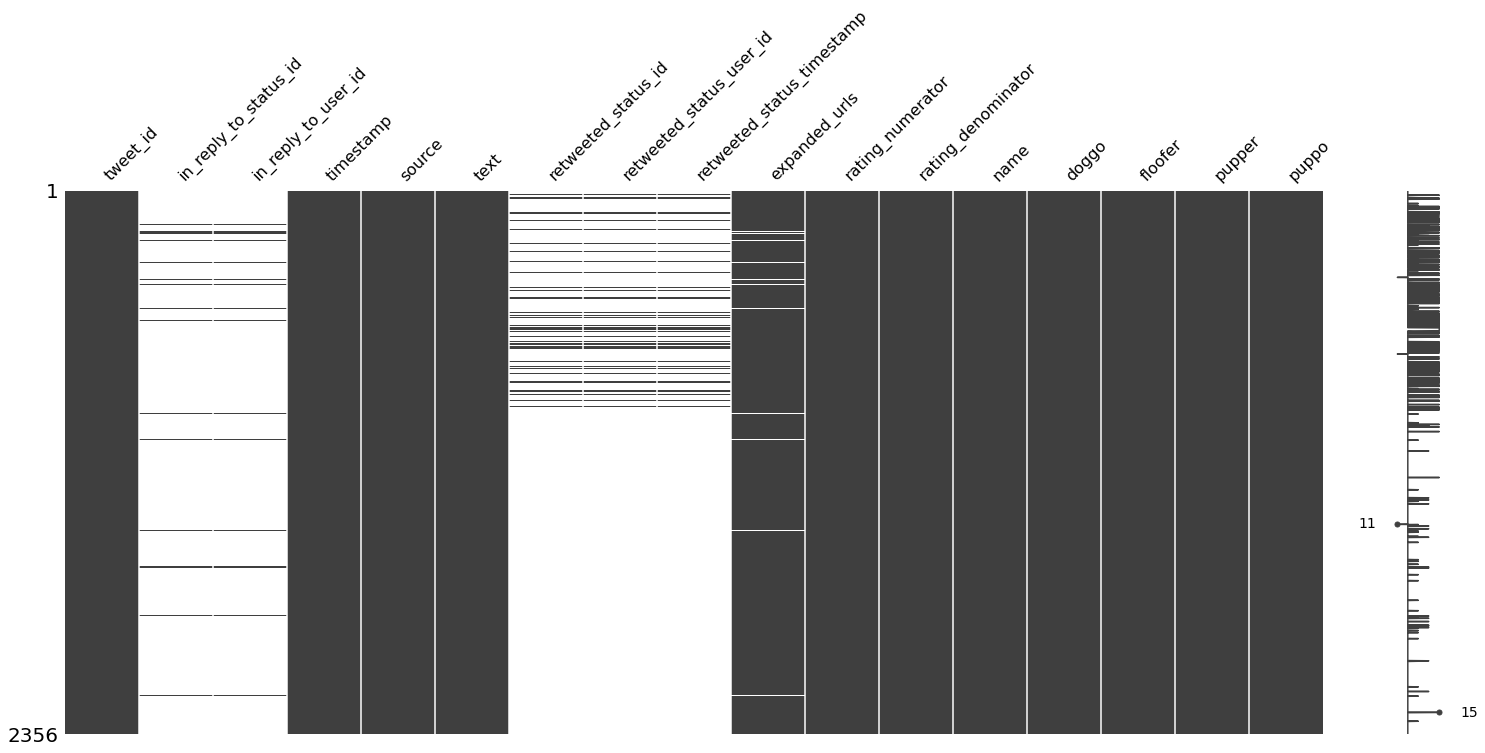

In [11]:
##identify missing values.
import missingno as msno
msno.matrix(df)

There are a lot of missing data in the columns about the reply and the retweeted status. 

In [12]:
df['source']

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

restate the source to appear as a proper website link.

In [13]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

From the information in this dataset, we find two datatype problems need to be dealt with:
a. The datatype of the tweet_id column should be String
b. The datatype of the timestamp column should be Datetime

In [14]:
df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
df.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


There are also lots of “None” in the “doggo”, “floorfer”, “pupper”, and “puppo” columns. This needs to be corrected. 

In [16]:
df['tweet_id'].nunique()

2356

In [17]:
df['name'].nunique()

957

In [18]:
df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

Name like “None”, “a”, and “an” exist which is definitely an error we need to correct.

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
# check what stopwords are there in the name list.
name_list = sorted(df['name'].unique().tolist())
all_stopwords = stopwords.words('english')
all_stopwords.append('None')
identified_sw = [word for word in name_list if word in all_stopwords]
identified_sw

['None',
 'a',
 'all',
 'an',
 'by',
 'his',
 'just',
 'my',
 'not',
 'such',
 'the',
 'this',
 'very']

### Data 2: Tweet image predictions (image_predictions.tsv)

In [22]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<AxesSubplot:>

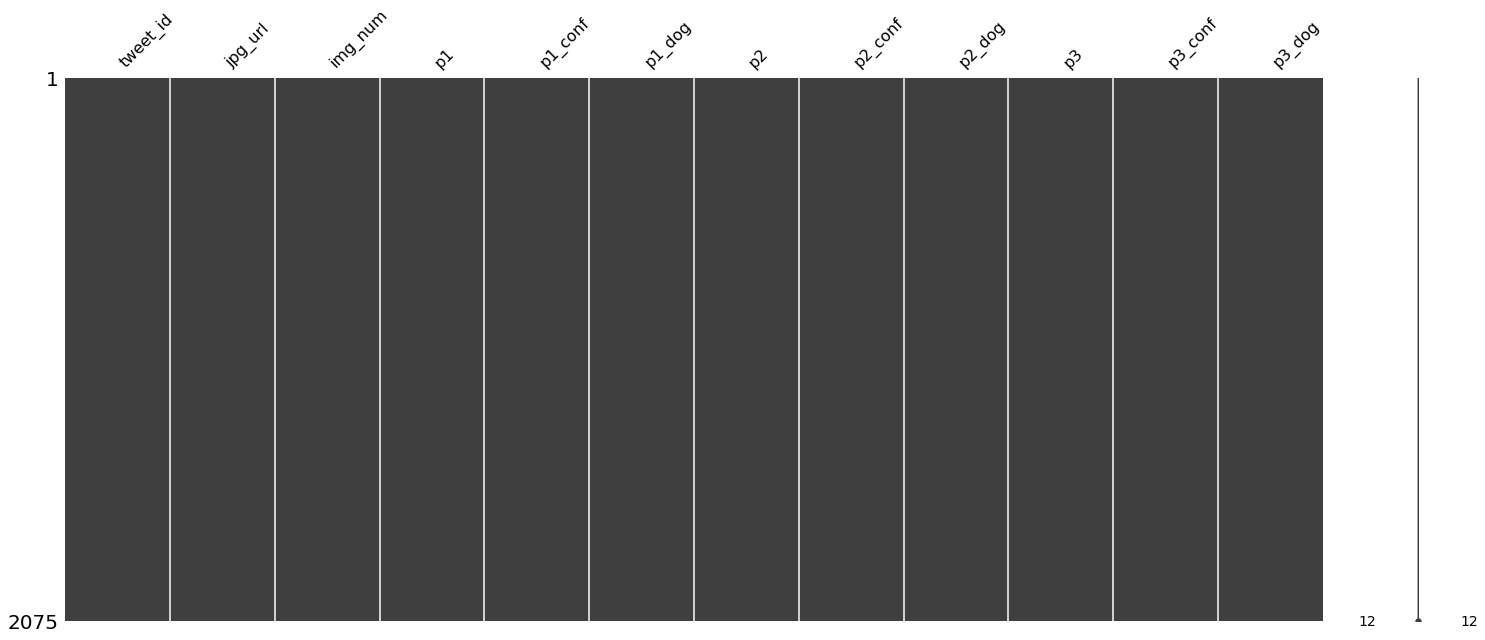

In [23]:
msno.matrix(images)

In [24]:
images['tweet_id'].nunique()

2075

In [25]:
images.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


From the samples above we can tell that:

a. There are rows without any predictions of the dog

b. There are both uppercase and lowercase characters in the p1, p2, p3 results columns. Also, the prediction result in these three columns also shows that there are lots of other species’ pictures, not just dog pictures.



In [26]:
images.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

tweet_id data type needs to be adjusted to a string not int.

In [27]:
images[['p1_dog','p2_dog','p3_dog']].apply(lambda x:
    (x[0] == False and x[1] == False and x[2] == False) , axis = 1).value_counts()

False    1751
True      324
dtype: int64

There are 324 records without the prediction of the dog breed. Our analysis is only about dogs so this predictions needs to be removed.

## Data 3: WeRateDogs Twitter API

In [28]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
 3   retweeted       2326 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 56.9 KB


<AxesSubplot:>

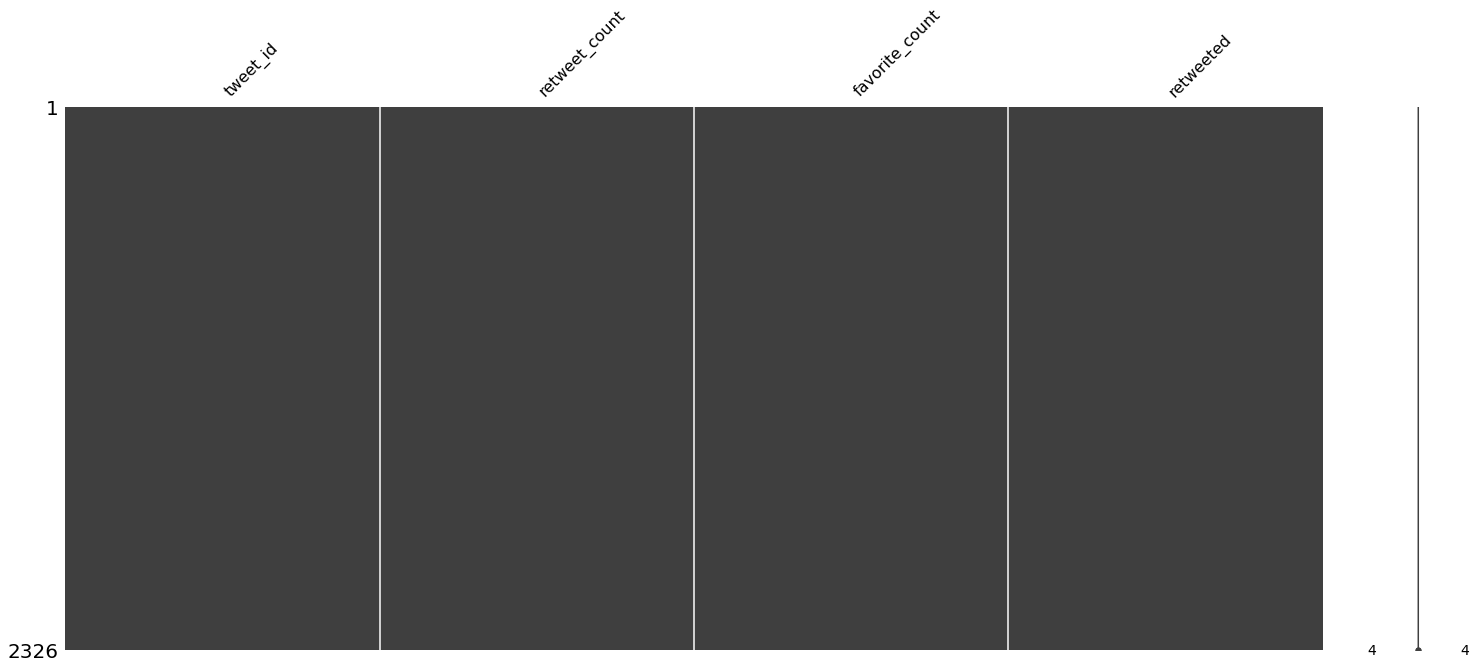

In [29]:
msno.matrix(twitter_data)

In [30]:
twitter_data.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
retweeted          bool
dtype: object

In [ ]:
tweet_id needs to be converted to string.

# Dataset Cleaning

Merge all 3 Datasets to effect changes to commons columns like tweet_id

In [31]:
df_master = pd.merge(df, images, on = 'tweet_id', how = 'outer')
df_master = pd.merge(df_master, twitter_data, on = 'tweet_id', how = 'outer')
df_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,retweeted
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,7000.0,33801.0,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,5298.0,29315.0,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,3477.0,22043.0,False
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7222.0,36917.0,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7754.0,35297.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,37.0,89.0,False
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,115.0,247.0,False
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,36.0,100.0,False
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,39.0,112.0,False


its important to create a copy of your dataset for refrencing ahead of cleaning. so that should you mistakenly make an edit it can be corrected.

In [54]:
df_masters = df_master.copy()

### 1. Change inappropriate datatype to the right type

In [56]:
df_masters['tweet_id'] = df_masters['tweet_id'].astype('str')
df_masters.timestamp = pd.to_datetime(df_masters.timestamp)

### 2. Restate the source to appear as a proper website link

In [57]:
source = df_masters['source'].str.split('"')
links = []
for link in range(len(source.values)):
    links.append(source.values[i][1])
df_masters['source'] = links
df_masters['source']

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
                       ...                
2351    http://twitter.com/download/iphone
2352    http://twitter.com/download/iphone
2353    http://twitter.com/download/iphone
2354    http://twitter.com/download/iphone
2355    http://twitter.com/download/iphone
Name: source, Length: 2356, dtype: object

### 3. Drop the retweets, reply records, drop the columns we do not need and drop the tweets without an image or with images which don’t display dogs

we only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets

In [58]:
#check with the column for the number of the no retweets records
df_masters.dropna(subset = ['retweeted'], inplace = True)

In [59]:
df_masters['retweeted'].value_counts()

False    2326
Name: retweeted, dtype: int64

In [60]:
#We only want the rows without an entry in “retweeted_status_id”
df_masters = df_masters[df_masters['retweeted_status_id'].isnull()]

In [61]:
df_masters['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [62]:
#We only want the rows without an entry in “in_reply_to_status_id”
df_masters = df_masters[df_masters.in_reply_to_status_id.isnull()]

In [63]:
# The rows without an image are the ones that the “jpg_url” column is not null
df_masters.dropna(subset = ['jpg_url'], inplace = True)

In [64]:
df_masters['jpg_url'].value_counts()

https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg    1
https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg    1
https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg    1
https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg    1
https://pbs.twimg.com/media/CXhZom1UwAA4Zz6.jpg    1
                                                  ..
https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg    1
https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg    1
https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg    1
https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg    1
https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg    1
Name: jpg_url, Length: 1962, dtype: int64

In [65]:
# sort for images which do not display dogs are the ones without a dog breed identification.
df_masters.drop(df_masters.query('p1_dog == False and p2_dog == False and p3_dog == False').index, inplace = True)

In [66]:
#drop the Unnecessary  columns since they are empty already
df_masters.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp", "retweeted"], inplace=True, axis = 1)

In [67]:
df_masters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 1 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1657 non-null   object             
 1   timestamp           1657 non-null   datetime64[ns, UTC]
 2   source              1657 non-null   object             
 3   text                1657 non-null   object             
 4   expanded_urls       1657 non-null   object             
 5   rating_numerator    1657 non-null   int64              
 6   rating_denominator  1657 non-null   int64              
 7   name                1657 non-null   object             
 8   doggo               1657 non-null   object             
 9   floofer             1657 non-null   object             
 10  pupper              1657 non-null   object             
 11  puppo               1657 non-null   object             
 12  jpg_url             1657 non-null 

### 4. Create new column that combines “doggo”, “floorfer”, “pupper”, and “puppo”  as dog_stages.

In [68]:
# replace “None” with '' in each column
for x in ['doggo','floofer','pupper', 'puppo']:
 df_masters[x].replace('None', '', inplace = True)

# #combine all 4 columns to create one column called dog_stages
df_masters['dog_stage'] = df_masters['doggo'] + df_masters[
 'floofer']+ df_masters['pupper'] + df_masters['puppo']
df_masters.dog_stage.value_counts()

                1401
pupper           166
doggo             53
puppo             21
floofer            7
doggopupper        7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [69]:
###drop column 'doggo','floofer','pupper', 'puppo'

df_masters.drop(['doggo','floofer','pupper','puppo'], inplace=True, axis = 1)

In [71]:
df_masters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 1 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1657 non-null   object             
 1   timestamp           1657 non-null   datetime64[ns, UTC]
 2   source              1657 non-null   object             
 3   text                1657 non-null   object             
 4   expanded_urls       1657 non-null   object             
 5   rating_numerator    1657 non-null   int64              
 6   rating_denominator  1657 non-null   int64              
 7   name                1657 non-null   object             
 8   jpg_url             1657 non-null   object             
 9   img_num             1657 non-null   float64            
 10  p1                  1657 non-null   object             
 11  p1_conf             1657 non-null   float64            
 12  p1_dog              1657 non-null 

### 5. Replace the wrong names in name column

In [72]:
# replace the stopwords into nan
for x in identified_sw:
 df_masters['name'].replace(x, np.nan, inplace = True)
df_masters.name.value_counts()

Cooper        10
Tucker         9
Lucy           9
Charlie        9
Oliver         9
              ..
Chevy          1
Philbert       1
Rupert         1
Brudge         1
Christoper     1
Name: name, Length: 839, dtype: int64

### 6. Capitalizing each text in column p1, p2,p3

In [73]:
# Capitalizing each name
df_masters['p1'] = df_masters['p1'].str.capitalize()
df_masters['p2'] = df_masters['p2'].str.capitalize()
df_masters['p3'] = df_masters['p3'].str.capitalize()
df_masters

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,5298.0,29315.0,
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,3477.0,22043.0,
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,7222.0,36917.0,
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7754.0,35297.0,
5,891087950875897856,2017-07-29 00:08:17+00:00,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2599.0,17801.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,37.0,89.0,
2352,666044226329800704,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,...,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,115.0,247.0,
2353,666033412701032449,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,...,True,Malinois,0.138584,True,Bloodhound,0.116197,True,36.0,100.0,
2354,666029285002620928,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,...,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,39.0,112.0,


### 7. Reduce the prediction columns into two — breed and confidence, only use the breed with the highest confidence.

In [74]:
#extract the most likely prediction which is a dog
def prediction(x):
 """
 input: 
 Columns: p1_dog, p1/p1_conf, p2_dog, p2/p2_conf, p3_conf
 output:
 Results after checking the true/false of the p1_dog and p2_dog   columns
 """
 if x[0] == True:
    return x[1]
 elif x[2] == True:
    return x[3]
 else:
    return x[4]
 
df_masters['breed'] = df_masters[['p1_dog', 'p1', 'p2_dog', 'p2', 'p3']].apply(prediction, axis = 1)
df_masters['confidence'] = df_masters[['p1_dog', 'p1_conf', 'p2_dog', 'p2_conf', 'p3_conf']].apply(prediction, axis = 1)
df_masters.iloc[:,13:].head(10)

,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,breed,confidence
1,Pekinese,0.090647,True,Papillon,0.068957,True,5298.0,29315.0,,Chihuahua,0.323581
2,Malamute,0.078253,True,Kelpie,0.031379,True,3477.0,22043.0,,Chihuahua,0.716012
3,Labrador_retriever,0.168086,True,Spatula,0.040836,False,7222.0,36917.0,,Labrador_retriever,0.168086
4,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7754.0,35297.0,,Basset,0.555712
5,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2599.0,17801.0,,Chesapeake_bay_retriever,0.425595
6,Border_collie,0.199287,True,Ice_lolly,0.193548,False,1659.0,10361.0,,Appenzeller,0.341703
7,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,15748.0,56833.0,,Pomeranian,0.566142
8,Irish_setter,0.193054,True,Chesapeake_bay_retriever,0.118184,True,3617.0,24511.0,,Irish_terrier,0.487574
9,Cardigan,0.451038,True,Chihuahua,0.029248,True,6093.0,27946.0,doggo,Pembroke,0.511319
10,Pomeranian,0.013884,True,Chow,0.008167,True,6147.0,27027.0,,Samoyed,0.957979


drop unwanted columns.

In [76]:
df_masters.drop(['p1','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'],axis = 1, inplace = True)

In [77]:
df_masters.breed = df_masters.breed.str.replace("_",' ')
df_masters.breed = df_masters.breed.str.lower()
df_masters.breed.value_counts()

golden retriever      155
labrador retriever    103
pembroke               94
chihuahua              90
pug                    62
                     ... 
entlebucher             1
japanese spaniel        1
standard schnauzer      1
silky terrier           1
irish wolfhound         1
Name: breed, Length: 113, dtype: int64

In [78]:
df_masters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 1 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1657 non-null   object             
 1   timestamp           1657 non-null   datetime64[ns, UTC]
 2   source              1657 non-null   object             
 3   text                1657 non-null   object             
 4   expanded_urls       1657 non-null   object             
 5   rating_numerator    1657 non-null   int64              
 6   rating_denominator  1657 non-null   int64              
 7   name                1192 non-null   object             
 8   jpg_url             1657 non-null   object             
 9   img_num             1657 non-null   float64            
 10  retweet_count       1657 non-null   float64            
 11  favorite_count      1657 non-null   float64            
 12  dog_stage           1657 non-null 

<AxesSubplot:>

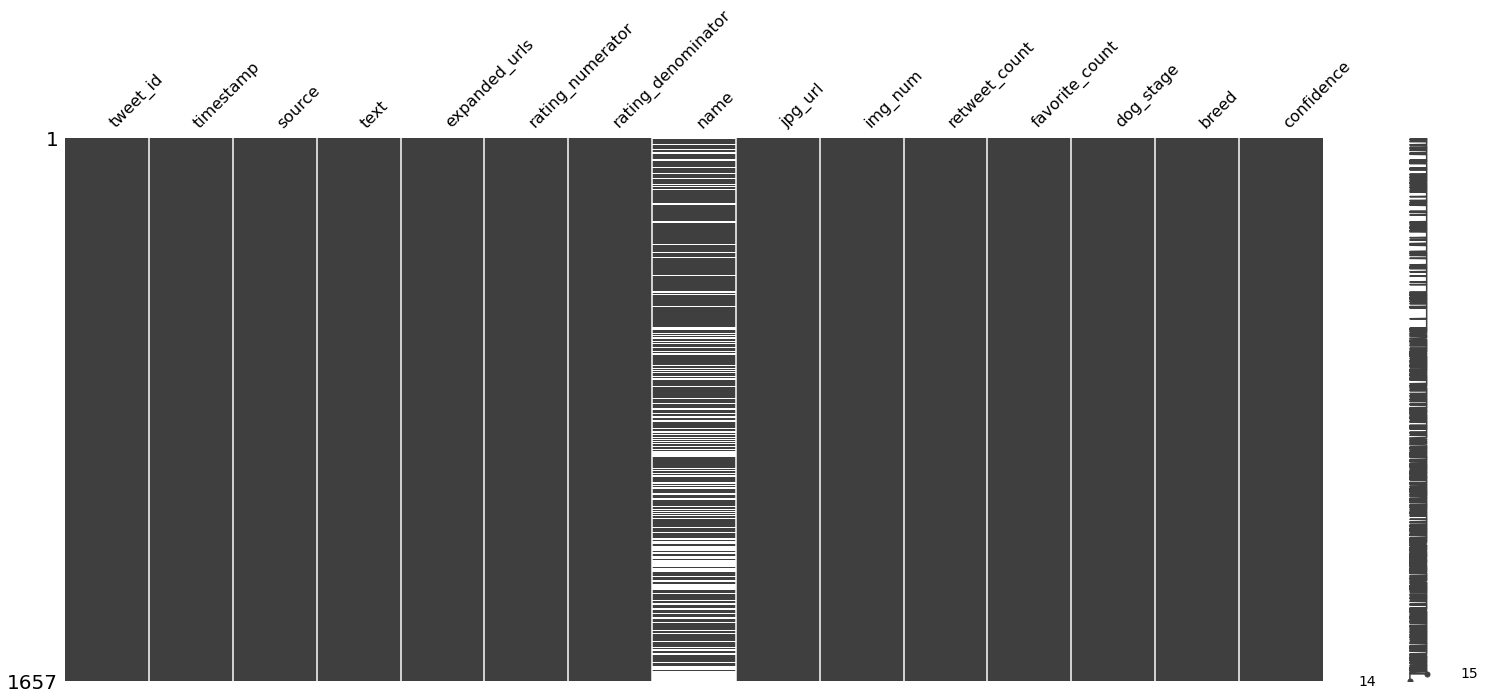

In [79]:
msno.matrix(df_masters)

updated dataframe shows alot of data is still missing in the name column so we will drop it.

In [80]:
df_masters.drop(columns = 'name', inplace = True)

<AxesSubplot:>

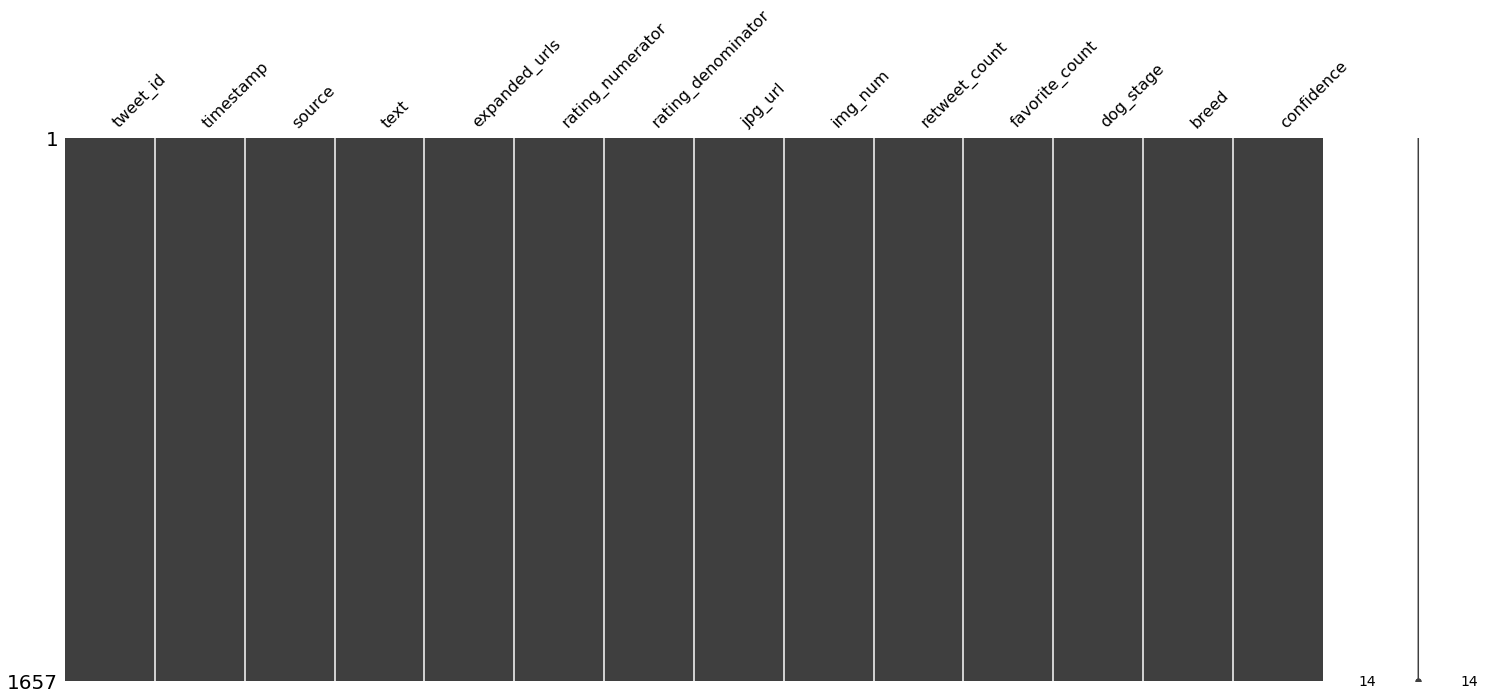

In [87]:
msno.matrix(df_masters)

In [94]:
df_masters.to_csv('twitter_archive_master.csv', sep = '\t', index=False)

# Analyzing and Visualizing Data

In [95]:
df = pd.read_csv('twitter_archive_master.csv', sep = '\t')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,retweet_count,favorite_count,dog_stage,breed,confidence
0,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,5298.0,29315.0,NaN,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,3477.0,22043.0,NaN,chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,7222.0,36917.0,NaN,labrador retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,7754.0,35297.0,NaN,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17+00:00,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,2599.0,17801.0,NaN,chesapeake bay retriever,0.425595


## 1 .What dog stage is must popular according to the neural network's image predictions ?

This helps us identify the most preffered dog stage by dog lovers.

In [98]:
# Let's see how popular each stages are in the dataset 
df['dog_stage'].value_counts()

pupper          166
doggo            53
puppo            21
floofer           7
doggopupper       7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

Text(0, 0.5, 'Counts')

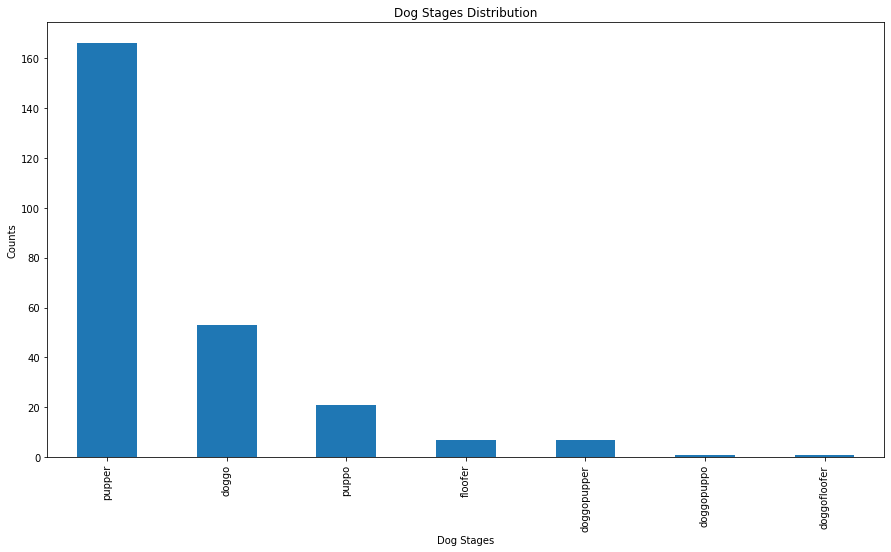

In [100]:
import seaborn as sns
# Let's see how popular each stages are in the dataset 
counts  = df['dog_stage'].value_counts()
counts.plot(kind = 'bar',figsize = (15,8))
plt.title('Dog Stages Distribution')
plt.xlabel('Dog Stages')
plt.ylabel('Counts')

Pupper is the most popular dog in the dataset. A pupper is a small dog, usually younger  than the other dog according to the dogs lingo

### 2. Which dog breed has the largest number of retweet count, favorite count, and rating?

retweet_count
                 breed  retweet_count  favorite_count
45    golden retriever       475205.0       1681928.0
62  labrador retriever       311516.0       1030726.0
80            pembroke       236469.0        904824.0
27           chihuahua       209843.0        666561.0
88             samoyed       155930.0        481900.0
favorite_count
                 breed  retweet_count  favorite_count
45    golden retriever       475205.0       1681928.0
62  labrador retriever       311516.0       1030726.0
80            pembroke       236469.0        904824.0
27           chihuahua       209843.0        666561.0
41      french bulldog       132086.0        525927.0


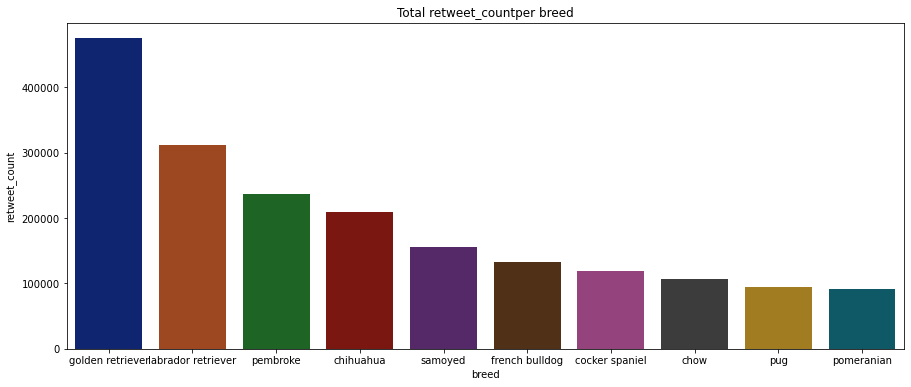

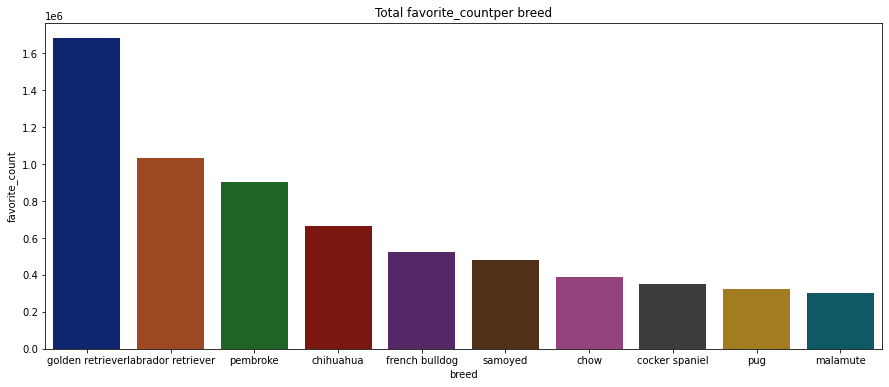

In [112]:
df_breed_total = df.groupby('breed').agg({'retweet_count': "sum", 'favorite_count': "sum"}).reset_index()
# Check the top 5 breeds
for i in ['retweet_count', 'favorite_count']:
 print(i)
 print(df_breed_total.sort_values(by = i, ascending = False).head())
 fig, ax = plt.subplots(figsize = (15,6))
 ax = sns.barplot(x = 'breed', y = i, data = df_breed_total.sort_values(i, \
 ascending = False).iloc[:10], palette = 'dark')
 ax.set_title('Total ' + i + 'per breed')

From the above visuals, its obvious the most liked and retweeted tweets are the images of a Golden Retriever. The second and third breeds are Labrador Retriever and Pembroke Welsh Corgi.

## 3. What is the correlation between favourite count and retweet count?

In [117]:
df[['favorite_count', 'retweet_count']].corr(method='pearson')

,favorite_count,retweet_count
favorite_count,1.000000,0.930475
retweet_count,0.930475,1.000000


Text(0, 0.5, 'Count')

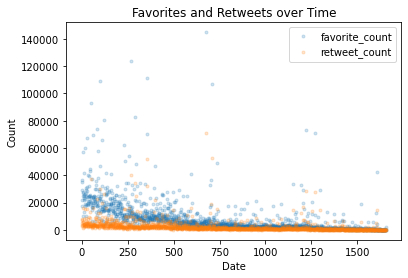

In [115]:
df[['favorite_count', 'retweet_count']].plot(style = '.', alpha = .2)
plt.title('Favorites and Retweets over Time')
plt.xlabel('Date')
plt.ylabel('Count')

There is positive correlation between favorites and retweets,with a correlation close to 1. This indicates that there is large tendency that if the tweet is good in general that there will be more retweets and favorites.

(0.0, 20.0)

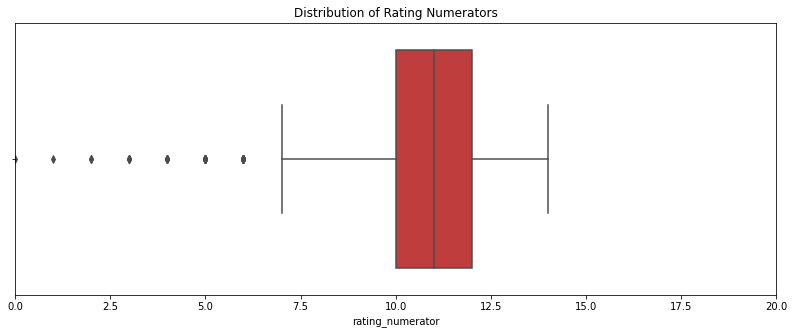

In [118]:
rt = df[['rating_numerator','favorite_count','retweet_count']]
fig = plt.figure(figsize = (30,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Distribution of Rating Numerators')

sns.boxplot(data=rt,x='rating_numerator',color=sns.color_palette()[3],ax=ax1);
plt.xlim(0,20)

The x axis limit has to be set to a range of 0 to 20 in order to gain a more understandable view of the distribution of ratings in the dataset, as can be seen from the box plot where there are numerous outliers. The boxplot's minimum and maximum ratings are 7 and 15, respectively. Its lower and upper quartile ratings are 10 and 12, respectively, with an IQR of 3.